# **Regresión Logística/Clasificación: Breast Cancer Wisconsin**

In [ ]:
semilla = 28314688

## **Introducción**




#### El cáncer de mama es una de las principales causas de mortalidad en mujeres. Su detección temprana puede mejorar significativamente las tasas de supervivencia. En este estudio, usaremos un modelo de Regresión Logística para que nos ayude a clasificar tumores en benignos (no cancerosos) o malignos (cancerosos).

### Para ello, utilizaremos el conjunto de datos Breast Cancer Wisconsin de Scikit-Learn, el cual contiene 30 atributos numéricos extraídos de imágenes de tumores, como el radio, textura y perímetro de las células cancerígenas.

## **Carga y Exploración de los datos**

### Vemos en el siguiente codigo como cargamos el dataset y lo guardamos en las varaibles que le pasaremos al modelo y ademas mostramos unas filas de esos datos para ver como  

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Cargar el dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Ver las primeras filas de los datos
print(X.head())
print(y.value_counts())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  mean compactness  mean concavity  mean concave points  mean symmetry  mean fractal dimension  radius error  texture error  perimeter error  area error  smoothness error  compactness error  concavity error  concave points error  symmetry error  fractal dimension error  worst radius  worst texture  worst perimeter  worst area  worst smoothness  worst compactness  worst concavity  worst concave points  worst symmetry  worst fractal dimension
0      17.9900       10.3800        122.8000  1001.0000           0.1184            0.2776          0.3001               0.1471         0.2419                  0.0787        1.0950         0.9053           8.5890    153.4000            0.0064             0.0490           0.0537                0.0159          0.0300                   0.0062       25.3800        17.3300         184.6000   2019.0000            0.1622             0.6656           0.7119                0.2654        



*   Clase 0: Tumores malignos (M).
*   Clase 1: Tumores benignos (B).

## **Preprocesamiento de Datos**

### **División en entrenamiento y prueba**

#### Para evaluar correctamente el modelo, dividimos los datos en dos partes usando train_test_split():

*   80% (entrenamiento): Usado para ajustar los parámetros del modelo.
*   20% (prueba): Usado para medir el rendimiento del modelo en datos nunca antes vistos

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=semilla, stratify=y)

print(f"Número de muestras en entrenamiento: {X_train.shape[0]}")
print(f"Número de muestras en prueba: {X_test.shape[0]}")

Número de muestras en entrenamiento: 455
Número de muestras en prueba: 114


### **Normalización**

#### Los valores de las características pueden estar en diferentes escalas. Por ejemplo, el radio de una célula puede estar entre 6 y 30, mientras que la textura puede estar entre 0 y 1, y vemos mucha variacion entre los rangos de los distintos valores.

#### Para evitar que algunas variables dominen el modelo, usamos StandardScaler() para transformar los datos a una distribución con media 0 y varianza 1. Esto mejora la estabilidad del modelo y acelera el proceso de aprendizaje.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Construcción y Evaluación del Modelo:**

### Con este codigo entrenamos a nuestro modelo con los datos de entrenamiento mediante fit() y despues hacemos unas predicciones en el conjunto de prueba

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="liblinear", random_state=semilla)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

### Una vez entrenado el modelo y generado las predicciones, podemos evaluar las métricas para verificar si presenta sobreajuste o si no está realizando buenas predicciones con nuevos datos. Vamos a utilizar las métricas de Precisión, F1-Score, Curvas ROC y AUC. Vamos a analizar cada una de ellas, explicando qué hacen y analizando los resultados.

### **Precisión (Accuracy):**

#### La precisión mide qué tan bien el modelo clasifica correctamente las instancias de un conjunto de datos. En términos simples, es la proporción de predicciones correctas (tanto positivas como negativas) sobre el total de predicciones realizadas. En el contexto de este modelo que estamos evaluando, la precisión nos permite ver qué tan bien el modelo está clasificando tanto los datos de entrenamiento como los de prueba, lo que nos ayuda a entender si el modelo está generalizando adecuadamente o si está sobreajustado.

In [ ]:
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score

accuracy_train = accuracy_score(y_train, model.predict(X_train)) * 100
accuracy_test = accuracy_score(y_test, y_pred) * 100

print("Precisión en el conjunto de entrenamiento: {:.2f}%".format(accuracy_train))
print("Precisión en el conjunto de prueba: {:.2f}%".format(accuracy_test))

Precisión en el conjunto de entrenamiento: 98.68%
Precisión en el conjunto de prueba: 96.49%


#### Observando estos valores, podemos notar que la precisión en el conjunto de entrenamiento es del 98.68%, mientras que en el conjunto de prueba es del 96.49%. Esto indica que no hay sobreajuste significativo, ya que ambas métricas son altas y cercanas entre sí. Además, estos resultados reflejan un buen desempeño del modelo. Sin embargo, para ser más meticulosos y asegurar una regularización adecuada, podemos afinar la búsqueda del hiperparámetro C en un rango más corto y específico.


#### La regularización, en este caso, tiene como objetivo controlar la complejidad del modelo, evitando que se ajuste demasiado a los datos de entrenamiento y, por lo tanto, mejorando su capacidad de generalización. Al ajustar el valor de C, podemos encontrar un equilibrio óptimo entre el ajuste a los datos de entrenamiento y la capacidad de generalización del modelo.

In [ ]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression(penalty='l2', solver='liblinear', random_state=semilla)

param_grid = {'C': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Entrenamos
grid_search.fit(X_train, y_train)

# Mejor valor de C en ese rango
best_C = grid_search.best_params_['C']
print("Mejor valor de C encontrado:", best_C)

# Entrenamos con ese valor de C
best_model = LogisticRegression(penalty='l2', C=best_C, solver='liblinear', random_state=semilla)
best_model.fit(X_train, y_train)

# Hacemos predicciones
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

accuracy_train = accuracy_score(y_train, best_model.predict(X_train)) * 100
accuracy_test = accuracy_score(y_test, y_pred) * 100

print("Precisión en el conjunto de entrenamiento con el mejor C: {:.2f}%".format(accuracy_train))
print("Precisión en el conjunto de prueba con el mejor C: {:.2f}%".format(accuracy_test))

Mejor valor de C encontrado: 0.05
Precisión en el conjunto de entrenamiento con el mejor C: 98.24%
Precisión en el conjunto de prueba con el mejor C: 97.37%


#### Al comparar los dos modelos, el que utiliza regularización con C = 0.05 y el que no la utiliza, se observan diferencias importantes que nos permiten entender cómo la regularización influye en el rendimiento del modelo. En el modelo sin regularización, la precisión en el conjunto de entrenamiento es muy alta (98.68%), lo que indica que el modelo se ajusta muy bien a los datos de entrenamiento. Sin embargo, esta alta precisión no se traduce de la misma manera en el conjunto de prueba, donde la precisión es menor (96.49%). Esto sugiere que el modelo sin regularización puede estar capturando ruido o patrones específicos de los datos de entrenamiento que no son generalizables a nuevos datos, es decir, hay un ligero sobreajuste.

#### Por otro lado, el modelo con regularización (C = 0.05) muestra una precisión ligeramente menor en el conjunto de entrenamiento (98.24%), pero mejora significativamente en el conjunto de prueba (97.37%). Esto indica que la regularización está cumpliendo su propósito: controlar la complejidad del modelo para evitar que se ajuste demasiado a los datos de entrenamiento. Al hacerlo, el modelo se vuelve más robusto y generaliza mejor a datos no vistos. La mejora en la precisión de prueba, aunque no sea enorme, es relevante porque refleja una mayor capacidad del modelo para realizar predicciones precisas en situaciones reales, donde los datos pueden ser ligeramente diferentes a los de entrenamiento.

#### La elección de C = 0.05 como el mejor valor sugiere que los datos se benefician de una regularización relativamente fuerte. Esto puede deberse a la presencia de ruido en los datos, características irrelevantes o redundantes. La regularización L1, en particular, ayuda a eliminar características menos importantes, lo que contribuye a un modelo más simple pero más efectivo. En resumen, el modelo con regularización no solo evita el sobreajuste, sino que también mejora la capacidad de generalización, lo que lo convierte en una opción más confiable y adecuada.

### **F1-Score:**

#### El F1-score es la media armónica entre la precisión y el recall. La media armónica es una forma de promediar dos valores, dando más peso a los valores más bajos. Esto es útil porque asegura que el F1-score no sea alto si una de las dos métricas (precisión o recall) es baja. Es especialmente útil cuando las clases están desbalanceadas. Por ejemplo, si tienes muchas más muestras de una clase que de otra, ya que proporciona una evaluación más equilibrada.



In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average='binary') * 100
print("F1-score: {:.2f}%".format(f1))

F1-score: 97.96%


#### Un F1-score de 97.96% es un resultado excelente que indica que el modelo está logrando un equilibrio casi perfecto entre la precisión y el recall. En términos prácticos, esto significa que el modelo es muy efectivo para identificar correctamente los tumores malignos (alta sensibilidad o recall) y, al mismo tiempo, está cometiendo muy pocos errores al predecir tumores benignos como malignos (alta precisión). En el contexto médico, esto es crucial, ya que un alto recall asegura que no se pasen por alto casos de cáncer, mientras que una alta precisión evita generar alarmas falsas que podrían causar estrés innecesario en los pacientes y costos adicionales por pruebas de seguimiento.

#### Con este resultado podemos decir que el modelo está bien ajustado. Sin embargo, es importante destacar que, aunque el rendimiento es muy bueno, vamos a verificar otras métricas, como las Curvas ROC y el AUC, para asegurar que este score no es engañoso debido a la cantidad no completamente balanceada de datos en cada clase.

#### **Curva ROC y AUC**

#### La Curva ROC es una gráfica que muestra cómo el modelo se comporta en términos de la Tasa de Verdaderos Positivos (TPR) y la Tasa de Falsos Positivos (FPR) para diferentes umbrales de clasificación. La TPR mide la proporción de tumores malignos que el modelo identificó correctamente, mientras que la FPR mide la proporción de tumores benignos que fueron incorrectamente clasificados como malignos. Un modelo perfecto tendría una curva ROC que pasa por la esquina superior izquierda (TPR = 1, FPR = 0), mientras que un modelo aleatorio seguiría la diagonal de la grafica.



#### El AUC es el área bajo la curva ROC y resume el rendimiento del modelo en un solo valor. Un AUC de 1.0 indica un modelo perfecto, mientras que un AUC de 0.5 indica que el modelo no es mejor que una predicción aleatoria. En el contexto de tu problema, un AUC alto (por ejemplo, 0.98) indica que el modelo es muy bueno para distinguir entre tumores malignos y benignos, independientemente del umbral de clasificación.

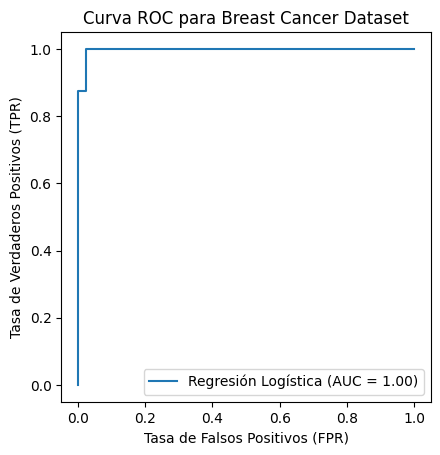

In [ ]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# (AUC)
roc_auc = auc(fpr, tpr)

# Mostrar la curva ROC
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Regresión Logística')
display.plot()

# Grafica
plt.title("Curva ROC para Breast Cancer Dataset")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.axis("square")
plt.show()

#### Un AUC de 1.00 indica que el modelo es perfecto en términos de su capacidad para distinguir entre tumores malignos y benignos. Esto significa que, para todos los umbrales de clasificación, el modelo logra una Tasa de Verdaderos Positivos (TPR) del 100% sin generar Falsos Positivos (FPR). En otras palabras:

*   TPR = 1.0: El modelo identifica correctamente todos los tumores malignos.
*   FPR = 0.0: El modelo no clasifica incorrectamente ningún tumor benigno como maligno.

#### La curva ROC pasa por la esquina superior izquierda (0, 1), lo que es el punto ideal para un modelo de clasificación. Esto indica que: El modelo tiene una capacidad de discriminación perfecta entre las dos clases (maligno y benigno).No hay solapamiento entre las distribuciones de probabilidad de las clases, lo que significa que el modelo puede separar perfectamente los tumores malignos de los benignos.
#### Aunque los valores del F1-score y la presicion no sean perfectas y el AUC sea de 1.00 puede llegar a causar un poco de ruido pero debemos entender que el AUC evalúa la capacidad del modelo para distinguir entre clases en todos los umbrales de clasificación posibles. Un AUC de 1.00 indica que el modelo puede separar perfectamente las clases (en este caso, tumores malignos y benignos) en términos de probabilidades. Esto significa que no hay solapamiento entre las distribuciones de probabilidad de las dos clases, y el modelo es capaz de asignar probabilidades más altas a los tumores malignos que a los benignos (o viceversa) de manera consistente.

#### Por otro lado, la precisión y el F1-score dependen del umbral de clasificación que se elija en este caso es por defecto (0.5). Estas métricas miden el rendimiento del modelo en un umbral específico, no en todos los umbrales posibles. Si el umbral no es óptimo, la precisión y el F1-score pueden ser menores al 100%, incluso si el AUC es 1.00. Por ejemplo, si el umbral por defecto no está calibrado para maximizar la precisión o el F1-score, el modelo podría estar cometiendo errores en las predicciones binarias (maligno/benigno), aunque las probabilidades subyacentes estén perfectamente separadas.



## **Preguntas finales**

### Una vez que entrenamos y evaluamos el modelo y mostramos toda esa información en la sección anterior, podemos complementar esos conceptos contestando las siguientes preguntas:

### 1. Si tuviesen que seleccionar de un universo de N mujeres, k mujeres donde de tal manera que las mujeres representen los datos disponibles. Como harian?

#### Se puede utilizar una técnica llamada **muestreo estratificado**. Esta técnica es especialmente útil cuando el conjunto de datos tiene clases desbalanceadas (por ejemplo, más tumores benignos que malignos) y queremos asegurarnos de que el subconjunto seleccionado mantenga la misma proporción de clases que el conjunto original.

#### Entonces este método asegura que la proporción de clases (tumores malignos y benignos) en el subconjunto sea la misma que en el conjunto original. Garantizando que el subconjunto sea representativo y útil para análisis posteriores. En código, esto se puede implementar fácilmente usando la función train_test_split de scikit-learn con el parámetro stratify=y. Como lo tenemos en nuestro codigo de la separacion de los datos tenemos implementado eso

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=semilla, stratify=y)

### 2. El jefe de IT del hospital quisiera tener a la mano una implementacion del algoritmo de Curvas ROC y ademas de la metrica de area debajo de la curva

#### Como vimos en la otra seccion un algoritmo para esta implementacion seria el siguiente

In [ ]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# (AUC)
roc_auc = auc(fpr, tpr)

# Mostrar la curva ROC
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Regresión Logística')
display.plot()

# Grafica
plt.title("Curva ROC para Breast Cancer Dataset")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.axis("square")
plt.show()

### 3. Como afecta el balance de clases al modelo?

#### El balance de clases en un conjunto de datos tiene un impacto significativo en el rendimiento y la interpretación de un modelo de clasificación. Cuando las clases están desbalanceadas (es decir, una clase tiene muchas más muestras que la otra), pueden surgir varios problemas que afectan la capacidad del modelo para aprender y generalizar adecuadamente. Vamos a analizar cómo afecta el desbalance de clases al modelo y qué se puede hacer para mitigar estos efectos.

#### Sesgo hacia la Clase Mayoritaria

*   Un modelo entrenado con clases desbalanceadas tiende a favorecer a la clase mayoritaria, ya que puede lograr una alta precisión simplemente prediciendo siempre la clase más frecuente.
*   Por ejemplo, si el 90% de los tumores son benignos y el 10% son malignos, un modelo que siempre predice "benigno" tendría una precisión del 90%, pero no sería útil para identificar tumores malignos.

#### Métricas Engañosas

*   La exactitud (presicion) puede ser engañosa en casos de desbalance. Un modelo puede tener una alta exactitud simplemente prediciendo siempre la clase mayoritaria, pero esto no refleja su capacidad para identificar la clase minoritaria.

#### Dificultad para Aprender la Clase Minoritaria

*  Los algoritmos de aprendizaje automático tienden a optimizar la función de pérdida global, lo que puede hacer que ignoren la clase minoritaria.
*  Esto resulta en un bajo recall (sensibilidad) para la clase minoritaria, lo que significa que el modelo no logra identificar correctamente los casos positivos (por ejemplo, tumores malignos).

#### Sobreajuste a la Clase Mayoritaria

*   El modelo puede sobreajustarse a la clase mayoritaria, lo que reduce su capacidad para generalizar a nuevos datos, especialmente para la clase minoritaria.

#### En el caso de este dataset puede afectar que:

*   Tener dificultades para identificar correctamente los tumores malignos (clase minoritaria).
*   Lograr una alta exactitud, pero un bajo recall para la clase minoritaria.
*   Generar predicciones sesgadas hacia la clase mayoritaria (benigna).











### 4. Por que es importante usar AUC y F1-score ademas de la exactitud?


#### El uso de métricas como el AUC y el F1-score, además de la exactitud (accuracy), es esencial para evaluar correctamente este modelo de clasificación, especialmente en problemas donde las clases están desbalanceadas o donde los errores tienen consecuencias importantes, como en diagnósticos médicos. La exactitud, aunque es una métrica fácil de entender, tiene limitaciones significativas. Por ejemplo, en un dataset con muchas más muestras de una clase que de otra, un modelo puede lograr una alta exactitud simplemente prediciendo siempre la clase mayoritaria, lo que no es útil para identificar la clase minoritaria. Esto es particularmente problemático en el caso del cáncer de mama, donde no detectar un tumor maligno (falso negativo) puede tener consecuencias graves.

#### Entonces usamos el F1-score y el AUC. El F1-score combina dos métricas clave: la precisión (cuántas predicciones positivas son correctas) y el recall (cuántos casos positivos reales se identificaron correctamente). Esta combinación es especialmente útil cuando tanto los falsos positivos como los falsos negativos son importantes. Por ejemplo, en el diagnóstico de cáncer, un falso negativo (no detectar un tumor maligno) es muy costoso, pero un falso positivo (clasificar un tumor benigno como maligno) también puede generar puede ser fatal. El F1-score nos da un equilibrio entre estos dos aspectos, lo que lo hace más robusto que la exactitud en casos de desbalance.

#### Por otro lado, el AUC evalúa la capacidad del modelo para distinguir entre clases en todos los umbrales de clasificación posibles. A diferencia de la exactitud y el F1-score, que dependen de un umbral específico, el AUC nos dice qué tan bien el modelo puede separar las clases en términos de probabilidades. Un AUC cercano a 1.0 indica que el modelo es excelente para distinguir entre tumores malignos y benignos, independientemente del umbral que se elija. Esto es especialmente útil porque nos permite evaluar el rendimiento del modelo de manera más completa, sin depender de un umbral fijo.